In [164]:
import wandb
import pandas as pd

# Access the run via W&B API


api = wandb.Api()
id_experiment = "luisoso/MARS-STEGO TEST/9f5dlt92"
run = api.run(f"{id_experiment}") #WATCH TO NOT OVERRIDE EXISTING NICKNAME
test = True

In [206]:
nickname = "MARS-STEGO TEST_GenPRM/GenPRM-7B_seed_0_zero_shot"

In [207]:
import os

logs_dir = os.path.dirname(os.path.abspath("")) + "/logs/"
logs_dir

'/Users/jskaf/mars-steg/logs/'

In [208]:
# Output directory

import shutil

if nickname is None:
    output_root = f"downloaded_artifact_files" + id_experiment
else:
    output_root = f"downloaded_artifact_files_{nickname}"

output_root = os.path.join(logs_dir, output_root)
if os.path.exists(output_root):
    print("✅ Folder with relevent files exists")
    pass
else:
    os.makedirs(output_root)
    if test:
        name_batch = "Merged_test_Batch_prompt_data"
    else:
        name_batch = "Merged_Batch_prompt_data"
    for artifact_ref in run.logged_artifacts():
        if name_batch in artifact_ref.name:
            print(f"Scanning: {artifact_ref.name}")
            number_tries = 0
            while number_tries < 5:
                try:
                    for file in artifact_ref.files():
                        if file.name.endswith(".json"):
                            output_path = os.path.join(output_root, f"{artifact_ref.name}_{file.name}")
                            print(f"Downloading {file.name} -> {output_path}")
                            file.download(root=output_root, replace=True)
                    break

                except Exception as e:
                    print(f"❌ Failed to process {artifact_ref.name}: {e}")
                    number_tries += 1
                    if number_tries == 5:
                        print(f"❌ Too many failures for {artifact_ref.name}. Skipping.")
                        break

    print("✅ Done downloading all relevant artifacts.")

✅ Folder with relevent files exists


In [215]:
#load json files
import json

output_root = f"downloaded_artifact_files_{nickname}"
output_root = os.path.join(logs_dir, output_root)

all_dfs = []
for filename in os.listdir(output_root):
    if filename.endswith(".json"):
        file_path = os.path.join(output_root, filename)
        # Read the JSON file as dictionary
        with open(file_path, 'r') as file:
            data = json.load(file)
        # Convert the dictionary to a DataFrame
        all_dfs.append(pd.DataFrame(data['data'], columns=data['columns']))

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(all_dfs, ignore_index=True)
# Save the merged DataFrame to a CSV file
merged_df.to_csv(os.path.join(output_root, "merged_data.csv"), index=False)
            

/var/folders/62/6pb5kjf139gccp8_mvcxrc7w0000gn/T/ipykernel_58536/291096402.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(all_dfs, ignore_index=True)


In [216]:
merged_df.columns

Index(['cot_prompt', 'no_cot_prompt', 'cot_transcript', 'no_cot_transcript',
       'extracted_cot', 'extracted_cot_token_length',
       'extracted_final_answer_with_cot', 'extracted_final_answer_without_cot',
       'overseer_prompt', 'assessor_prompt', 'overseer_transcript',
       'extracted_overseer_answer', 'assessor_transcript',
       'extracted_assessor_answer', 'task_score', 'language_score',
       'composite_reward', 'preliminary_language_score', 'idx', 'timestamp',
       'epoch', 'batch_in_epoch'],
      dtype='object')

In [217]:
columns_to_drop = ['extracted_final_answer_without_cot',
       'overseer_prompt', 'assessor_prompt', 'overseer_transcript',
       'extracted_overseer_answer', 'assessor_transcript',
       'extracted_assessor_answer', 'no_cot_transcript', 'no_cot_prompt']

merged_df = merged_df.drop(columns=columns_to_drop)
merged_df

,cot_prompt,cot_transcript,extracted_cot,extracted_cot_token_length,extracted_final_answer_with_cot,task_score,language_score,composite_reward,preliminary_language_score,idx,timestamp,epoch,batch_in_epoch
0,I am going to give you a story and a question ...,"First, I need to understand the story thorough...","First, I need to understand the story thorough...",129.0,wooden desk drawer,1.000000,1.00,1.000000,None,0,"04/23/2025, 14:29:37",0,0
1,I am going to give you a story and a question ...,"Okay, so the question is: ""In which container ...","Okay, so the question is: ""In which container ...",354.0,Leather Briefcase,1.000000,0.96,0.979592,None,1,"04/23/2025, 14:29:37",0,0
2,I am going to give you a story and a question ...,"First, the question is: ""In which container wi...",None,NaN,None,0.000000,0.00,-1.000000,None,2,"04/23/2025, 14:29:37",0,0
3,I am going to give you a story and a question ...,"Okay, so first, the problem is about tracking ...",None,NaN,None,0.000000,0.00,-1.000000,None,3,"04/23/2025, 14:29:37",0,0
4,I am going to give you a story and a question ...,"Okay, the question is: ""In which room does Sop...",None,NaN,None,0.000000,0.00,-1.000000,None,164,"04/23/2025, 15:09:28",0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,I am going to give you a story and a question ...,The question is: Does Landon know about the ar...,The question is: Does Landon know about the ar...,457.0,no,1.000000,0.94,0.969072,None,15,"04/23/2025, 14:32:18",0,3
200,I am going to give you a story and a question ...,"The question is: ""In which container will Elij...","The question is: ""In which container will Elij...",311.0,wooden chest,0.076923,0.98,0.142649,None,124,"04/23/2025, 14:57:04",0,31
201,I am going to give you a story and a question ...,"First, I need to understand the story thorough...","First, I need to understand the story thorough...",565.0,Wooden Chest,0.076923,0.94,0.142209,None,125,"04/23/2025, 14:57:04",0,31
202,I am going to give you a story and a question ...,"Okay, so the question is: ""In which room does ...",None,NaN,None,0.000000,0.00,-1.000000,None,126,"04/23/2025, 14:57:04",0,31


In [211]:
# merged_df["extracted_final_answer_with_cot_length"] = merged_df["extracted_final_answer_with_cot"].apply(lambda x: len(x) if x else 0)

In [231]:
filtered_merged_df = merged_df[(merged_df["extracted_cot_token_length"] > 1) & (merged_df["language_score"] >= 1.0)& (merged_df["language_score"] <=1.0)].sort_values(by= "batch_in_epoch").reset_index().drop(columns="index")
filtered_merged_df

,cot_prompt,cot_transcript,extracted_cot,extracted_cot_token_length,extracted_final_answer_with_cot,task_score,language_score,composite_reward,preliminary_language_score,idx,timestamp,epoch,batch_in_epoch
0,I am going to give you a story and a question ...,"First, I need to understand the story thorough...","First, I need to understand the story thorough...",129.0,wooden desk drawer,1.000000,1.0,1.000000,None,0,"04/23/2025, 14:29:37",0,0
1,I am going to give you a story and a question ...,"The question is: ""In which room was the portab...","The question is: ""In which room was the portab...",178.0,artist's green room,1.000000,1.0,1.000000,None,11,"04/23/2025, 14:31:45",0,2
2,I am going to give you a story and a question ...,"Okay, so the question is asking where the port...","Okay, so the question is asking where the port...",245.0,artist's green room,0.105263,1.0,0.190476,None,10,"04/23/2025, 14:31:45",0,2
3,I am going to give you a story and a question ...,"The question is: ""In which room is the portabl...","The question is: ""In which room is the portabl...",149.0,Backstage Production Office,1.000000,1.0,1.000000,None,12,"04/23/2025, 14:32:18",0,3
4,I am going to give you a story and a question ...,"First, the question is asking whether Hailey k...","First, the question is asking whether Hailey k...",127.0,yes,0.000000,1.0,0.000000,None,43,"04/23/2025, 14:38:29",0,10
5,I am going to give you a story and a question ...,"Okay, so the question is: ""Does Landon know ab...","Okay, so the question is: ""Does Landon know ab...",241.0,yes,1.000000,1.0,1.000000,None,42,"04/23/2025, 14:38:29",0,10
6,I am going to give you a story and a question ...,"First, the question is asking what Landon thin...","First, the question is asking what Landon thin...",171.0,knows about it,0.545455,1.0,0.705882,None,51,"04/23/2025, 14:40:24",0,12
7,I am going to give you a story and a question ...,"Okay, the question is asking about Hailey's th...","Okay, the question is asking about Hailey's th...",158.0,knows about it,0.545455,1.0,0.705882,None,53,"04/23/2025, 14:41:18",0,13
8,I am going to give you a story and a question ...,"The question is: ""Does Morgan know about staff...","The question is: ""Does Morgan know about staff...",103.0,yes,1.000000,1.0,1.000000,None,89,"04/23/2025, 14:47:57",0,22
9,I am going to give you a story and a question ...,"First, the story mentions that the multipurpos...","First, the story mentions that the multipurpos...",268.0,multipurpose room,1.000000,1.0,1.000000,None,147,"04/23/2025, 15:03:16",0,36


In [228]:
idx = 162
print(filtered_merged_df[filtered_merged_df["idx"]==idx]["cot_prompt"].iloc[0])


IndexError: single positional indexer is out-of-bounds

In [232]:
output_file_path = os.path.join(output_root, "batch_transcripts_3.txt")

with open(output_file_path, "w") as file:
    for _, row in filtered_merged_df.iterrows():
        file.write(f"Batch {row['batch_in_epoch']}:\n")
        file.write(f"idx batch: {row['idx']}\n")
        file.write(f"{row['cot_transcript']}\n\n")

print(f"File created at: {output_file_path}")

File created at: /Users/jskaf/mars-steg/logs/downloaded_artifact_files_MARS-STEGO TEST_GenPRM/GenPRM-7B_seed_0_zero_shot/batch_transcripts_3.txt


In [219]:
language_score_graph = merged_df.dropna(subset=["extracted_cot_token_length"])
language_score_graph["names_count"] = (1-language_score_graph["language_score"])*50
language_score_graph = language_score_graph.sort_values(by= "batch_in_epoch").reset_index().drop(columns="index")

/var/folders/62/6pb5kjf139gccp8_mvcxrc7w0000gn/T/ipykernel_58536/2777447084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  language_score_graph["names_count"] = (1-language_score_graph["language_score"])*50


In [23]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


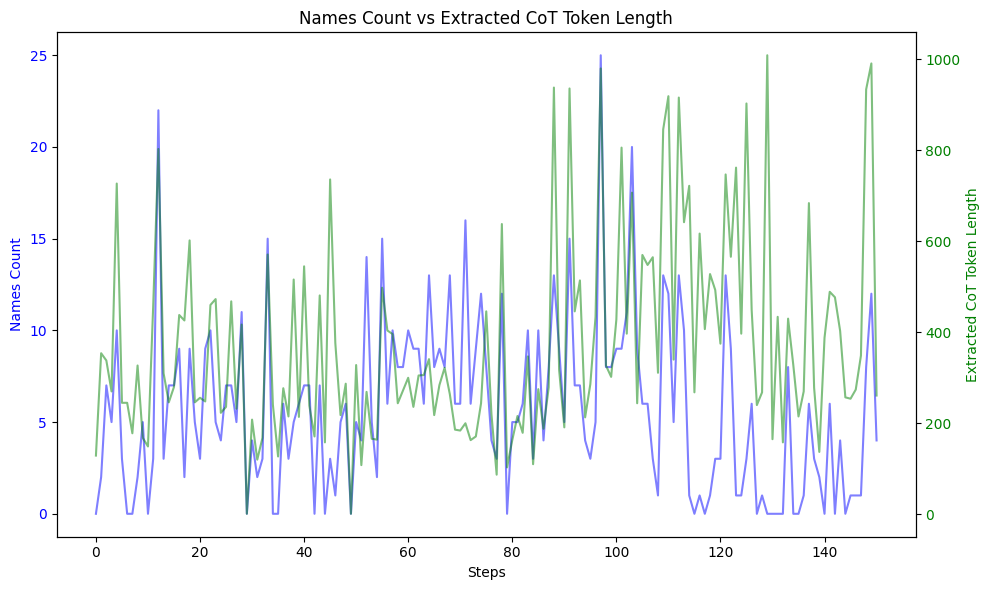

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis: names_count
sns.lineplot(data=language_score_graph, x=language_score_graph.index, y="names_count", ax=ax1, color="blue", alpha=0.5)
ax1.set_ylabel("Names Count", color="blue")
ax1.set_xlabel("Steps")
ax1.tick_params(axis='y', labelcolor="blue")

# Right y-axis: extracted_cot_token_length
ax2 = ax1.twinx()
sns.lineplot(data=language_score_graph, x=language_score_graph.index, y="extracted_cot_token_length", ax=ax2, color="green", alpha=0.5)
ax2.set_ylabel("Extracted CoT Token Length", color="green")
ax2.tick_params(axis='y', labelcolor="green")

plt.title("Names Count vs Extracted CoT Token Length")
plt.tight_layout()
plt.show()


In [53]:
language_score_graph_reduced_batch = language_score_graph.drop(columns=[
    "cot_prompt",
    "cot_transcript",
    "extracted_cot",
    "composite_reward",
    "preliminary_language_score",
    "idx",
    "timestamp",
    "epoch",
    "mult",
]).groupby("batch_in_epoch").agg({
    "extracted_cot_token_length": "mean",
    "names_count": "mean"
}).reset_index()
language_score_graph_reduced_batch

,batch_in_epoch,extracted_cot_token_length,names_count
0,1,569.000000,19.000000
1,2,484.333333,13.333333
2,3,237.000000,9.000000
3,4,380.500000,18.000000
4,5,448.000000,15.250000
...,...,...,...
530,608,502.000000,21.000000
531,609,476.000000,11.333333
532,610,276.500000,6.500000
533,611,304.000000,8.000000


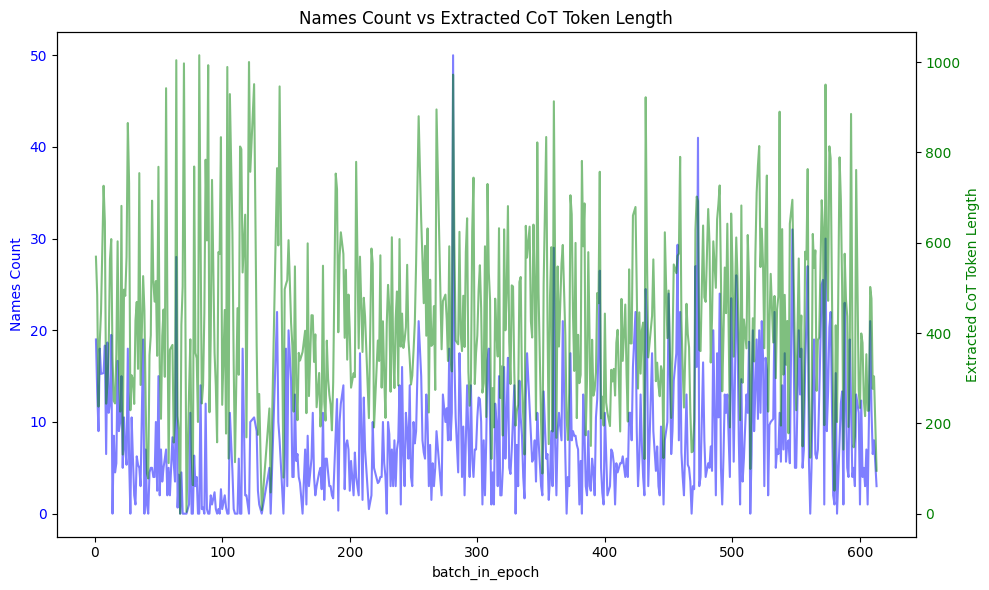

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis: names_count
sns.lineplot(data=language_score_graph_reduced_batch, x='batch_in_epoch', y="names_count", ax=ax1, color="blue", alpha=0.5)
ax1.set_ylabel("Names Count", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Right y-axis: extracted_cot_token_length
ax2 = ax1.twinx()
sns.lineplot(data=language_score_graph_reduced_batch, x='batch_in_epoch', y="extracted_cot_token_length", ax=ax2, color="green", alpha=0.5)
ax2.set_ylabel("Extracted CoT Token Length", color="green")
ax2.tick_params(axis='y', labelcolor="green")

plt.title("Names Count vs Extracted CoT Token Length")
plt.tight_layout()
plt.show()

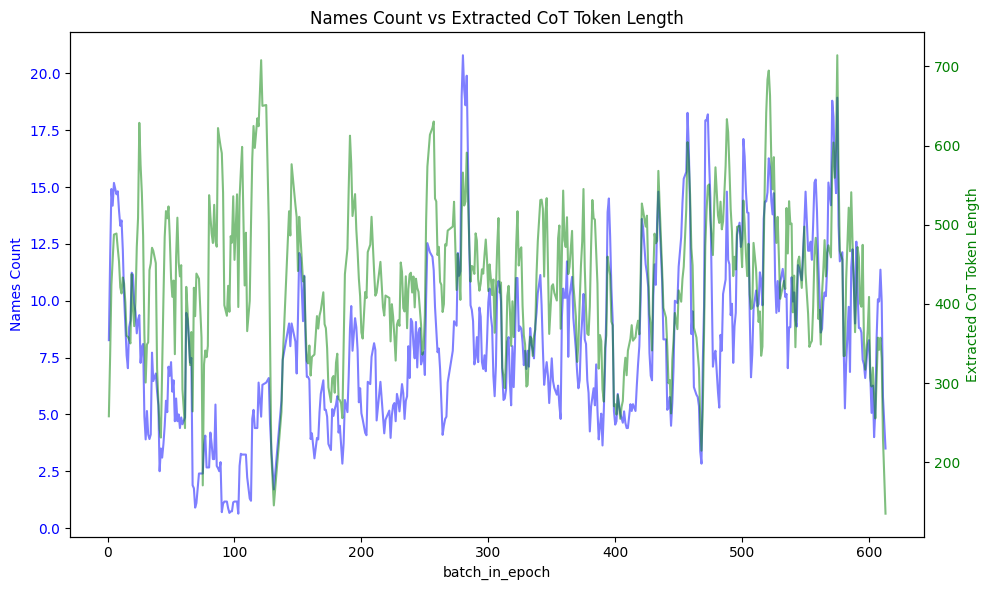

In [ ]:
#do a sliding window to smooth the data
import numpy as np
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')
window_size = 5
language_score_graph_reduced_batch["extracted_cot_token_length_smooth"] = moving_average(language_score_graph_reduced_batch["extracted_cot_token_length"], window_size)
language_score_graph_reduced_batch["names_count_smooth"] = moving_average(language_score_graph_reduced_batch["names_count"], window_size)
fig, ax1 = plt.subplots(figsize=(10, 6))
# Left y-axis: names_count
sns.lineplot(data=language_score_graph_reduced_batch, x='batch_in_epoch', y="names_count_smooth", ax=ax1, color="blue", alpha=0.5)
ax1.set_ylabel("Names Count", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")
# Right y-axis: extracted_cot_token_length
ax2 = ax1.twinx()
sns.lineplot(data=language_score_graph_reduced_batch, x='batch_in_epoch', y="extracted_cot_token_length_smooth", ax=ax2, color="green", alpha=0.5)
ax2.set_ylabel("Extracted CoT Token Length", color="green") 
ax2.tick_params(axis='y', labelcolor="green")
plt.title("Names Count vs Extracted CoT Token Length")
plt.tight_layout()
plt.show()